In [1]:
pwd

'C:\\Users\\Riddhima Mishra'

In [2]:
cd C:\cygwin64\home\Riddhima Mishra\persp-model_W18\ProblemSets\PS6

C:\cygwin64\home\Riddhima Mishra\persp-model_W18\ProblemSets\PS6


In [3]:
pwd

'C:\\cygwin64\\home\\Riddhima Mishra\\persp-model_W18\\ProblemSets\\PS6'

#### Reading the data and importing packages

In [6]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
import random
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

data = pd.read_csv("biden.csv", sep=',')

In [7]:
#Dropping Nans and defining x and y arrays

data= data.dropna()

y= data['biden'].values
x = data[['female', 'age', 'educ', 'dem', 'rep']].values

In [8]:
data.head()

,biden,female,age,educ,dem,rep
0,90,0,19,12,1,0
1,70,1,51,14,1,0
2,60,0,27,14,0,0
3,50,1,43,14,1,0
4,60,1,38,14,0,1


##### a. Decision Trees

In [10]:
#setting the seed

random.seed(1234)

#Splitting the dataset into training and test

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .7,
                                                    random_state=25)
hit_tree2 = DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)
hit_tree2.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

###### Plot

In [25]:
from sklearn.tree import export_graphviz 
#import graphviz

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz


def visualize_tree(tree):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

visualize_tree(hit_tree2)

###### MSE

In [12]:
y_pred = hit_tree2.predict(X_test)
MSE1 = mean_squared_error(y_test, y_pred)
print('MSE=', MSE1)

MSE= 416.45371543


#### b. 

In [27]:
#Fitting the model with default values

tree3 = DecisionTreeRegressor()
tree3.fit(X_train, y_train)

#MSE

y_pred = tree3.predict(X_test)
MSE_default = mean_squared_error(y_test, y_pred)
print('MSE=', MSE_default)

#Accuracy of the model that we created with modified model parameters.
score1 = tree3.score(X_test, y_test)
print("Acurracy of the model with default value:", score1)

MSE= 791.590667545
Acurracy of the model with default value: -0.447294663039


In [28]:
# Running a for loop for testing the model with the max acuracy by changing values for max_depth

for ind in range(1,11):
    tree_loop = DecisionTreeRegressor(max_depth= ind, min_samples_leaf=5)
    tree_loop.fit(X_train, y_train)
    y_pred_loop = tree_loop.predict(X_test)
    MSE_vec[ind - 1] = mean_squared_error(y_test, y_pred_loop)
    print('MSE=', MSE_vec[ind - 1])
    score = tree_loop.score(X_test, y_test)
    print("Accuracy of the model with max_depth =", ind, " is :",  score)

MSE= 440.139402497
Accuracy of the model with max_depth = 1  is : 0.195276758122
MSE= 407.97262097
Accuracy of the model with max_depth = 2  is : 0.254088481326
MSE= 416.45371543
Accuracy of the model with max_depth = 3  is : 0.238582180846
MSE= 431.370669243
Accuracy of the model with max_depth = 4  is : 0.211308959309
MSE= 445.151650907
Accuracy of the model with max_depth = 5  is : 0.186112677908
MSE= 467.68317917
Accuracy of the model with max_depth = 6  is : 0.144917446658
MSE= 484.575095411
Accuracy of the model with max_depth = 7  is : 0.11403332785
MSE= 503.651661929
Accuracy of the model with max_depth = 8  is : 0.0791549316755
MSE= 516.42783311
Accuracy of the model with max_depth = 9  is : 0.0557957826567
MSE= 523.140688975
Accuracy of the model with max_depth = 10  is : 0.0435224185745


Since, the lowest MSE and max accuracy is for max_depth= 2, we can fit the model with these parameters

#### c. Bagging 

In [13]:
tree4 = BaggingRegressor(DecisionTreeRegressor(), n_estimators=100,
                             max_samples=100, bootstrap=True, oob_score=True, random_state=15)
tree4.fit(x, y)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=100, n_jobs=1, oob_score=True,
         random_state=15, verbose=0, warm_start=False)

In [14]:
###MSE

tree4.score(x, y)
y_pred3 = tree4.oob_prediction_
MSE3 = mean_squared_error(y, y_pred3)
print('MSE=', MSE3)

MSE= 406.000558395


C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:987: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:987: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


Min. MSE= 405.856371415 , Min. B= 91


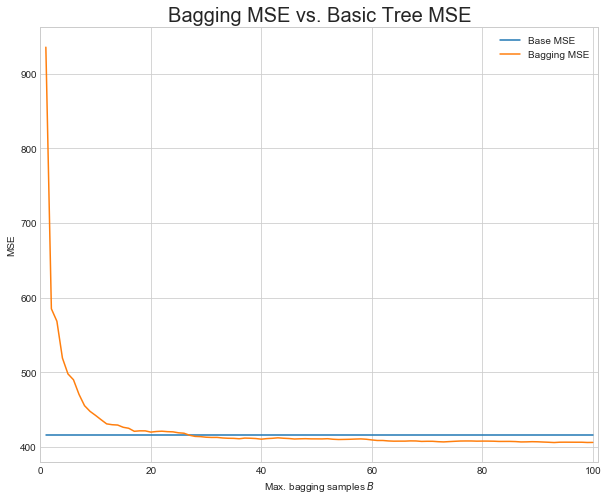

In [17]:
#Plots

#The mean squarred error has reduced which means we have become better at predicting
#Plot

from pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')


MSE_base = MSE1
max_samples = 100
MSE_vec = np.zeros(max_samples)
for ind in range(1, max_samples + 1):
    tree_loop = BaggingRegressor(DecisionTreeRegressor(), n_estimators=ind,
                                 max_samples=100, bootstrap=True, oob_score=True,
                                 random_state=15)
    tree_loop.fit(x, y)
    y_pred_loop = tree_loop.oob_prediction_
    MSE_vec[ind - 1] = mean_squared_error(y, y_pred_loop)
    #print('MSE=', MSE_vec[ind - 1])

fig, ax = plt.subplots()
plt.plot(np.arange(1, max_samples + 1), MSE_base * np.ones(max_samples),
         label='Base MSE')
plt.plot(np.arange(1, max_samples + 1), MSE_vec, label='Bagging MSE')
# for the minor ticks, use no labels; default NullFormatter
plt.title('Bagging MSE vs. Basic Tree MSE', fontsize=20)
plt.xlabel(r'Max. bagging samples $B$')
plt.ylabel(r'MSE')
plt.xlim((0, max_samples + 1))
plt.legend(loc='best')

print('Min. MSE=', MSE_vec.min(), ', Min. B=', np.argwhere(MSE_vec == MSE_vec.min())[0, 0] - 1)

#### d. Random Forests

In [23]:
#m = 1

tree_m1 = RandomForestRegressor(n_estimators=53, max_features=1, bootstrap=True,
                                  oob_score=True, random_state=15)
tree_m1.fit(x, y)

tree_m1.score(x, y)
y_pred4 = tree_m1.oob_prediction_
MSE_m1 = mean_squared_error(y, y_pred4)
print('MSE=', MSE_m1)

#Variable importance 

list(zip(tree_m1.feature_importances_))

MSE= 532.875057972


[(0.021333064405182765,),
 (0.51217509862848543,),
 (0.15018054715372878,),
 (0.1924320716293704,),
 (0.12387921818323255,)]

In [22]:
# m = 2

tree_m2 = RandomForestRegressor(n_estimators=53, max_features=2, bootstrap=True,
                                  oob_score=True, random_state=15)
tree_m2.fit(x, y)

tree_m2.score(x, y)
y_pred4 = tree_m2.oob_prediction_
MSE_m2 = mean_squared_error(y, y_pred4)
print('MSE=', MSE_m2)

#Variable importance

list(zip(tree_m2.feature_importances_))

MSE= 538.192542935


[(0.021104571833991309,),
 (0.50758431124010039,),
 (0.15142369561566391,),
 (0.19194351404282561,),
 (0.1279439072674188,)]

In [21]:
#m = 3

tree_m3 = RandomForestRegressor(n_estimators=53, max_features=3, bootstrap=True,
                                  oob_score=True, random_state=15)
tree_m3.fit(x, y)

tree_m3.score(x, y)
y_pred4 = tree_m3.oob_prediction_
MSE_m3 = mean_squared_error(y, y_pred4)
print('MSE=', MSE_m3)

list(zip(tree_m3.feature_importances_))

MSE= 535.761962701


[(0.027370799686630812,),
 (0.48465203636705279,),
 (0.16508946236227023,),
 (0.19916532223909172,),
 (0.12372237934495429,)]

Age is the most important variable for predicting the values for biden. 

Initially it looked MSE drops as more variables are included in the sample, but it isn't the case. The lowest MSE is obtained when less # of variables are included at each split. 
